In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.metrics import mean_squared_error, f1_score, mean_absolute_error, accuracy_score, plot_confusion_matrix, precision_score, recall_score
from sklearn import svm
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/cleaned_percent_five_states.csv')

In [3]:
df['covid_severity'] = 0
mask1 = df['cases_per_100_people'] < 2
mask2 = (df['cases_per_100_people'] >= 2) & (df['cases_per_100_people'] < 3)
mask3 = df['cases_per_100_people'] >= 3
df['covid_severity'][mask1] = 1
df['covid_severity'][mask2] = 2
df['covid_severity'][mask3] = 3
df['covid_severity'].value_counts()

1    228
3    158
2    157
Name: covid_severity, dtype: int64

In [46]:
228/(228+158+157)

0.4198895027624309

In [6]:
df.fillna(0, inplace=True)

In [7]:
X = df[['total_tests','sex_age_median_age_in_years','health_ins_noninst_pop_private','health_ins_noninst_pop_public',
                                          'inc_med_hhld_inc_dol','inc_mean_hhld_inc_dol','inc_per_capita_inc_dol','inc_med_earn_workers_dol',
                                          'inc_med_earn_male_full_yr_workers_dol','inc_med_earn_female_full_yr_workers_dol','pop_density','obes_percent',
                                          'percent_race_pop_hispanic_or_latino_of_any_race','percent_race_pop_white_alone',
                                          'percent_race_pop_black_or_african_american_alone','percent_race_pop_american_indian_and_alaska_native_alone',
                                          'percent_race_pop_asian_alone','percent_race_pop_native_hawaiian_and_other_pacific_islander_alone',
                                          'percent_race_pop_some_other_race_alone','percent_race_pop_two_or_more_races','percent_sex_age_pop_male',
                                          'percent_sex_age_pop_female','percent_sex_age_pop_under_5','percent_sex_age_pop_5_to_9','percent_sex_age_pop_10_to_14',
                                          'percent_sex_age_pop_15_to_19','percent_sex_age_pop_20_to_24','percent_sex_age_pop_25_to_34',
                                          'percent_sex_age_pop_35_to_44','percent_sex_age_pop_45_to_54','percent_sex_age_pop_55_to_59',
                                          'percent_sex_age_pop_60_to_64','percent_sex_age_pop_65_to_74','percent_sex_age_pop_75_to_84',
                                          'percent_sex_age_pop_85_and_over','percent_health_ins_noninst_pop_cov_yes','percent_health_ins_noninst_pop_cov_no',
                                          'percent_inc_hhlds_less_than_10_000','percent_inc_hhlds_10_000_to_14_999','percent_inc_hhlds_15_000_to_24_999',
                                          'percent_inc_hhlds_25_000_to_34_999','percent_inc_hhlds_35_000_to_49_999','percent_inc_hhlds_50_000_to_74_999',
                                          'percent_inc_hhlds_75_000_to_99_999','percent_inc_hhlds_100_000_to_149_999','percent_inc_hhlds_150_000_to_199_999',
                                          'percent_inc_hhlds_200_000_or_more']]

y = df['covid_severity']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22, stratify=y)

In [59]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [60]:
classification_models = [
    ['Logistic Regression: ', LogisticRegression()],
    ['K Nearest Neighbour: ', KNeighborsClassifier()], 
    ['Decision Tree: ', DecisionTreeClassifier()], 
    ['Bagging Classifier: ', BaggingClassifier()],
    ['Random Forest Classifier: ', RandomForestClassifier()], 
    ['Ada Boost Classifier: ', AdaBoostClassifier()], 
    ['SUpport Vector Classifier: ', SVC()]
]

In [61]:
precision_score(y_test, y_test, average = 'weighted')

1.0

In [62]:
precision_scores = []
sensitivity_scores = [] 
accuracy_scores = []

for name, model in classification_models:
    
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    preds = model.predict(X_test_scaled)
    
    print(f'Train score for {name} is {train_score}')
    print(f'Test score for {name} is {test_score}')
    print('Precision Score', precision_score(y_test, preds, average = 'macro'))
    print('Recall Score', recall_score(y_test, preds, average = 'macro'))
    print('Accuracy score', accuracy_score(y_test, preds))
    
    precision_scores.append(precision_score(y_test, preds, average='macro'))
    sensitivity_scores.append(recall_score(y_test, preds, average='macro'))
    accuracy_scores.append(accuracy_score(y_test, preds))

    print('\n')

Train score for Logistic Regression:  is 0.7051597051597052
Test score for Logistic Regression:  is 0.5220588235294118
Precision Score 0.4858165596388035
Recall Score 0.48920377867746284
Accuracy score 0.5220588235294118


Train score for K Nearest Neighbour:  is 0.714987714987715
Test score for K Nearest Neighbour:  is 0.5073529411764706
Precision Score 0.499172870140612
Recall Score 0.4831196581196581
Accuracy score 0.5073529411764706


Train score for Decision Tree:  is 1.0
Test score for Decision Tree:  is 0.45588235294117646
Precision Score 0.46869488536155207
Recall Score 0.4457377417903734
Accuracy score 0.45588235294117646


Train score for Bagging Classifier:  is 0.9778869778869779
Test score for Bagging Classifier:  is 0.5
Precision Score 0.45283638068448195
Recall Score 0.45610661268556
Accuracy score 0.5


Train score for Random Forest Classifier:  is 1.0
Test score for Random Forest Classifier:  is 0.5073529411764706
Precision Score 0.45673304883831206
Recall Score 0.47189

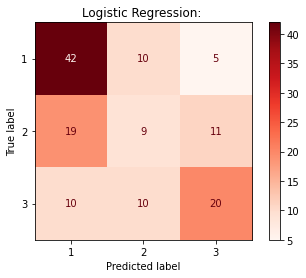

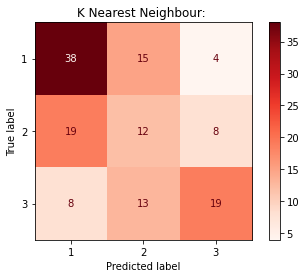

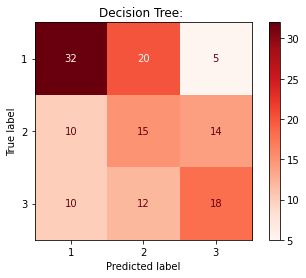

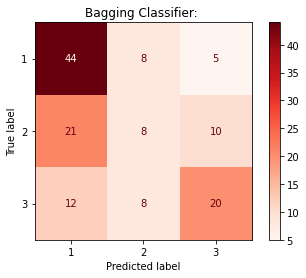

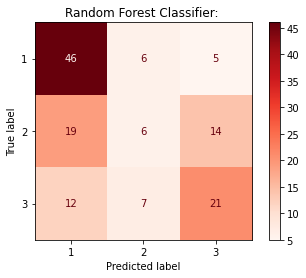

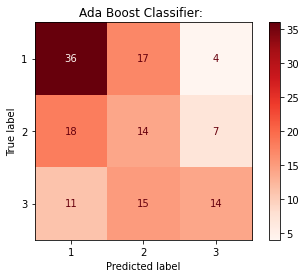

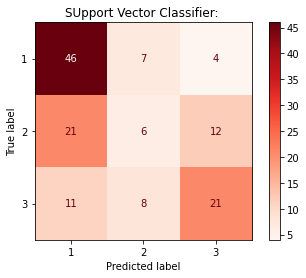

In [63]:
for name, model in classification_models:
        
    model.fit(X_train_scaled, y_train)
    
    plot_confusion_matrix(model, 
                          X_test_scaled,
                          y_test, 
                          display_labels=['1', '2', '3'], 
                          cmap=plt.cm.Reds )
    plt.title(f'{name}')